In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [21]:
file = '../Seeds/train.csv'
df = pd.read_csv(file)
print(sorted(df.columns))

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street'

Summary for numerical Features

In [22]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
print(summary_stats.head(5))

              count          mean          std     min      25%     50%  \
Id           1460.0    730.500000   421.610009     1.0   365.75   730.5   
MSSubClass   1460.0     56.897260    42.300571    20.0    20.00    50.0   
LotFrontage  1201.0     70.049958    24.284752    21.0    59.00    69.0   
LotArea      1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.5   
OverallQual  1460.0      6.099315     1.382997     1.0     5.00     6.0   

                  75%       max  
Id            1095.25    1460.0  
MSSubClass      70.00     190.0  
LotFrontage     80.00     313.0  
LotArea      11601.50  215245.0  
OverallQual      7.00      10.0  


Summary for categorical features

In [23]:
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
print(cat_summary_stats.head(5))

            count unique   top  freq
MSZoning     1460      5    RL  1151
Street       1460      2  Pave  1454
Alley          91      2  Grvl    50
LotShape     1460      4   Reg   925
LandContour  1460      4   Lvl  1311


Null Values in dataset

In [24]:
null_values = df.isnull().sum()
missing_percentage = (null_values / len(df)) * 100

print(missing_percentage.sort_values(ascending=False).head(10))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64


Questions to review the data:

1. Distribution of dwelling types and their relation to sales prices?
2. Does zoning impact sale price?
3. Does street and alley access types affect on sales price?
4. What is the average sales price by property shape?
5. Is there a Correlation between property age and sales price?
6. Is there a Correlation between Living Area and Sale Price?
7. Does price change year to year?

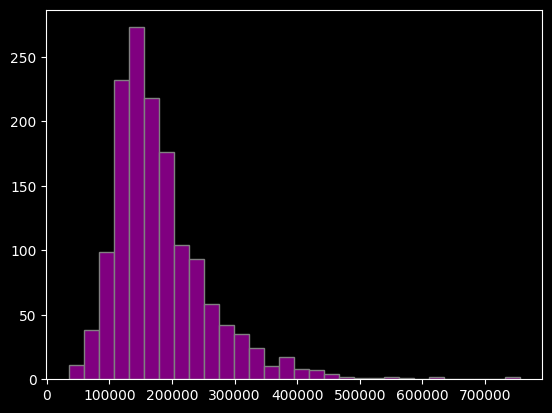

In [30]:
# Normal Distribution of SalePrice
mu, sigma = stats.norm.fit(df['SalePrice'])

plt.style.use('dark_background')
hist_data = plt.hist(df['SalePrice'], bins=30, color='purple',edgecolor='gray')

plt.show(hist_data)